# Project 2: Investigate a Dataset
###### By James Tooles

## The Purpose of Investigation

This project will conduct data analysis and create upon the 'Titanic Data' provided by Kaggle. The project will use Pandas and NumPy to attempt to answer and obtain insight into the questions below.

Question, Wrangle, Explore, Draw Conclusions, Communicate

## The Questions to Answer

1. What economic classes were most likely to survive?
2. What economic classes were most likely to not survive?
3. Were males or females more likely to survive?
4. Did the ticket fare paid effect the likelihood of survival?

## The Titanic Dataset

This dataset was provided by Udacity and was obtained from Kaggle. The feature descriptions are listed below for the 'Titanic Data'. To view the source of the dataset please see the following link as provided by [Kaggle](https://www.kaggle.com/c/titanic/data)

#### VARIABLE DESCRIPTIONS:

* survival - Survival (0 = No; 1 = Yes)
* pclass - Passenger Class (1 = 1st; 2 = 2nd; 3 = 3rd)
* sex - Sex
* age - Age
* sibsp - Number of Siblings/Spouses Aboard
* parch - Number of Parents/Children Aboard
* ticket - Ticket Number
* fare - Passenger Fare
* cabin - Cabin
* embarked - Port of Embarkation (C = Cherbourg; Q = Queenstown; S = Southampton)

#### SPECIAL NOTES:
* Pclass is a proxy for socio-economic status (SES) 1st ~ Upper; 2nd ~ Middle; 3rd ~ Lower


* Age is in Years; Fractional if Age less than One (1) If the Age is Estimated, it is in the form xx.5


* With respect to the family relation variables (i.e. sibsp and parch) some relations were ignored.  The following are the definitions used for sibsp and parch.
    
    
* Sibling:  Brother, Sister, Stepbrother, or Stepsister of Passenger Aboard Titanic
* Spouse:   Husband or Wife of Passenger Aboard Titanic (Mistresses and Fiances Ignored)
* Parent:   Mother or Father of Passenger Aboard Titanic
* Child:    Son, Daughter, Stepson, or Stepdaughter of Passenger Aboard Titanic


* Other family relatives excluded from this study include cousins, nephews/nieces, aunts/uncles, and in-laws.  Some children travelled only with a nanny, therefore parch=0 for them.  As well, some travelled with very close friends or neighbors in a village, however, the definitions do not support such relations.

## Wrangling The Titanic

The Titatnic Dataset will now be opened, viewed, and cleaned if needed.

In [234]:
import pandas as pd

#Read in 'titanic-data.csv and store as a pandas dataframe 'df'
#Print and view head of 'df'
df = pd.read_csv('titanic-data.csv')
df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Cleaning Missing Varible Entries

Recalling the questions of interest below:

1. What economic classes were most likely to survive?
2. t economic classes were most likely to not survive?
3. Where males or females more likely to survive?
4. Does the ticket fare paid effect the likelihood of survival?

<br/>
      
The following features are a concern while trying to address these questions:
* Survived
* Pclass
* Sex
* Ticket



In [235]:
#Get the df (column, row) dimentions
df.shape

(891, 12)

In [236]:
#Get the numerical df statistical descriptions
#Compare count with df shape dimentions
#Sanity check min, max df descriptions with given features
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The following numerical features are a concern while trying to address these questions:

* Survived
* Pclass
* Ticket

<br/>

None of these features seem to be missing any values as shown above.
The last variable of concern is the 'Sex' variable, which will be examined below

In [237]:
#Get the count of df rows for each feature
#Compare count with df shape dimentions
df.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

#### Cleaned Varible Entries

Recalling the questions of interest below:

1. What economic classes were most likely to survive?
2. What economic classes were most likely to not survive?
3. Where males or females more likely to survive?
4. Does the ticket fare paid effect the likelihood of survival?

<br/>

The following features are a concern while trying to address these questions:

* Survived
* Sex
* Ticket

<br/>

The following features are missing values but, are not a concern for answering the questions of interest:

* Age
* Cabin
* Embarked

<br/>

The data is now clean, for the purposes of answering the questions above.

## Exploring The Titanic

The Titatnic Dataset will now be explored. The features of interested will be displayed visually to gain further insight to obtain the knownledge needed to address the questions of interest.

Exploring the data to gain insight into the following question:

    1. What economic classes were most likely to survive?
    2. What economic classes were most likely to not survive?

In [238]:
%pylab inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

def showHist(data, set_bins, set_xlab = '', set_ylab = 'Count', set_title = ''):
    """
    Plots a histrogram for the pandas series or numpy array variable.
    
    data: data to be plotted into a histogram (non-empty pandas series or numpy array)
    set_bins: number of bins in which to group the data (integer > 0)
    set_xlab: label to display along the xaxis (string)
    set_ylab: label to display along the yaxis (string)
    set_title: title to display above histogram (string)
    
    @return: null
    """
    plt.hist(data, bins = set_bins)
    plt.xlabel(set_xlab)
    plt.ylabel(set_ylab)
    plt.title(set_title)
    plt.grid(True)
    plt.legend()
    plt.show()

Populating the interactive namespace from numpy and matplotlib


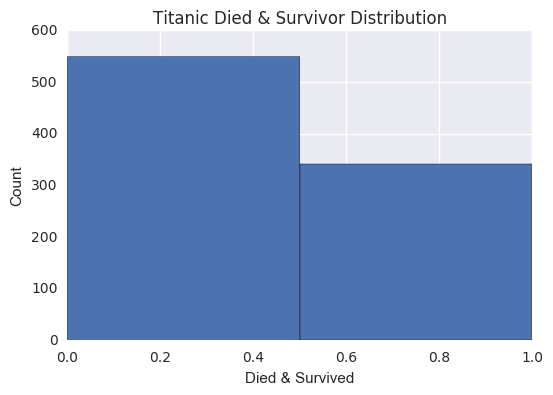

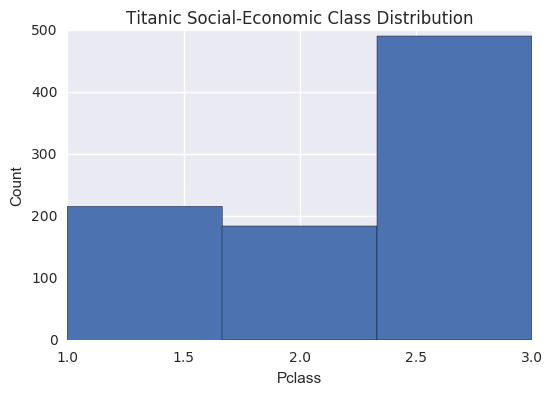

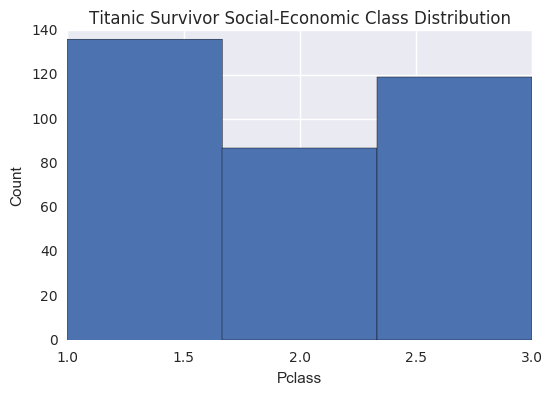

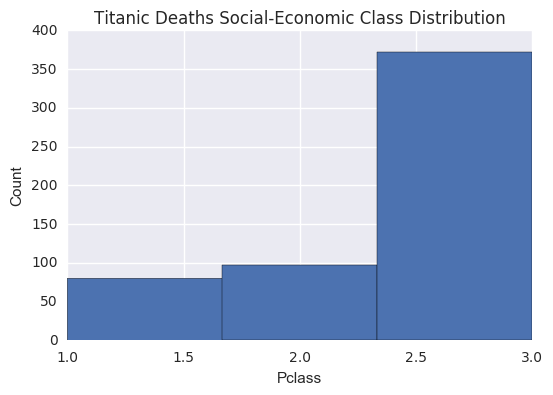

In [239]:
#Display histogram of Survived data
showHist(df['Survived'], 2, set_xlab = 'Died & Survived', set_title = 'Titanic Died & Survivor Distribution')

#Display histogram of Pclass data
showHist(df['Pclass'], 3, 
         set_xlab = 'Pclass', 
         set_title = 'Titanic Social-Economic Class Distribution')

#Get only survivor data, and plot Pclass for survivors
df_survived = df[df['Survived'] == 1]
showHist(df_survived['Pclass'], 3, 
         set_xlab = 'Pclass', 
         set_title = 'Titanic Survivor Social-Economic Class Distribution')

#Get only died data, and plot Pclass for survivors
df_died = df[df['Survived'] == 0]
showHist(df_died['Pclass'], 3, 
         set_xlab = 'Pclass', 
         set_title = 'Titanic Deaths Social-Economic Class Distribution')

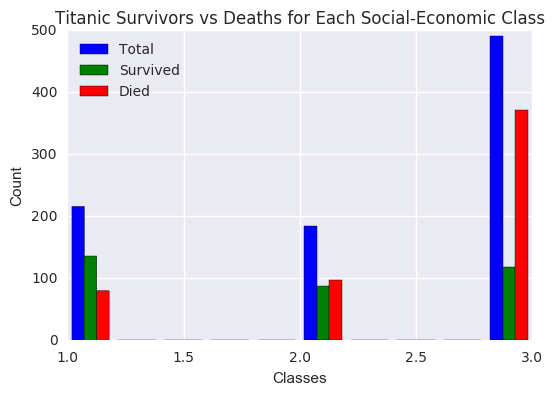

In [240]:
#Display histogram of Pclass for Total, Survived, Died
plt.hist([df['Pclass'], df_survived['Pclass'], df_died['Pclass']], 10, 
                            color=['blue', 'green', 'red'],
                            label=['Total', 'Survived', 'Died'])
plt.xlabel('Classes')
plt.ylabel('Count')
plt.title('Titanic Survivors vs Deaths for Each Social-Economic Class')
plt.grid(True)
plt.legend(loc = 2)

1. What economic classes were most likely to survive?
2. What economic classes were most likely to not survive?

Above it is difficult to answer these questions due to the scales of each class being different. A percentage chance for each class will be a more definitive solution.

In [241]:
def getPercentages(data, feature, feature_value):
    """
    Returns the percent values of deaths and survivors for a given feature

    data: dataframe containing Titanic Dataframe
    feature: feature to determine percent values (String)
    feature_value: value of feature to determine percent values (type(feature))

    @return: List of percent values for deaths and survivors (List of Floats) Ex.[deaths, survivors]
    """
    df_feature = data[data[feature] == feature_value]
    df_died_feature = df_feature[df_feature['Survived'] == 0]
    df_survived_feature = df_feature[df_feature['Survived'] == 1]

    return [float(len(df_died_feature))/float(len(df_feature)) * 100.0, 
            float(len(df_survived_feature))/float(len(df_feature)) * 100.0]

In [242]:
def showBarDiedSurvived(data, set_xlab = '', set_ylab = 'Percentage', set_title = ''):
    """
    Plots a bar graph for the List type

    data: data to be plotted into a bar graph (non-empty List type)
    set_xlab: label to display along the xaxis (string)
    set_ylab: label to display along the yaxis (string)
    set_title: title to display above histogram (string)

    @return: null
    """
    plt.bar([1, 2], data,
        align = 'center',
        color = ['red', 'green'],
        tick_label = ['Died ' + str(round(data[0], 2)) + '%', 
                      'Survived ' + str(round(data[1], 2)) + '%'])
    plt.xlabel(set_xlab)
    plt.ylabel(set_ylab)
    plt.title(set_title)
    plt.grid(True)
    plt.legend()
    plt.show()

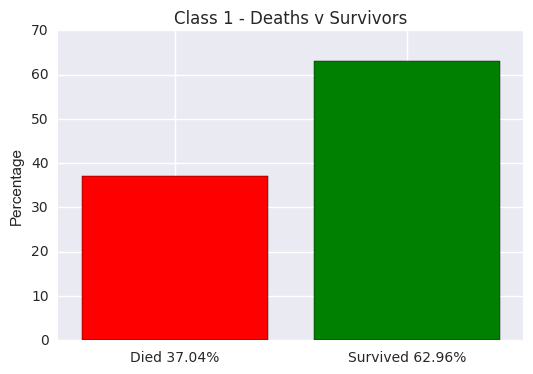

In [243]:
#Display histogram of Pclass == Class 1 for Died, Survived
class1_percentages = getPercentages(df, 'Pclass', 1)
showBarDiedSurvived(class1_percentages, set_title = 'Class 1 - Deaths v Survivors')

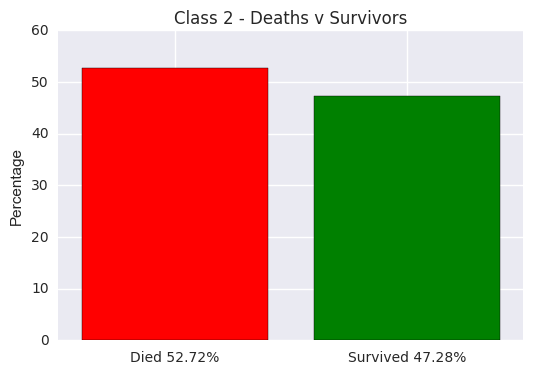

In [244]:
#Display histogram of Pclass == Class 2 for Died, Survived
class2_percentages = getPercentages(df, 'Pclass', 2)
showBarDiedSurvived(class2_percentages, set_title = 'Class 2 - Deaths v Survivors')

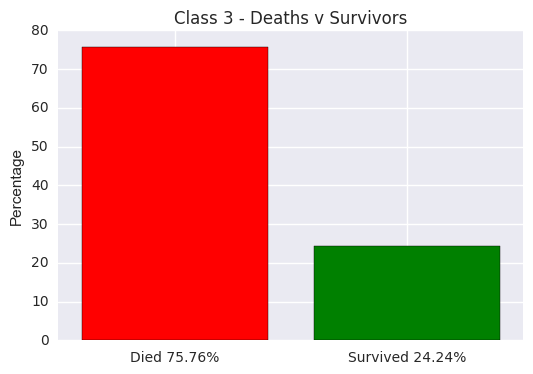

In [245]:
#Display histogram of Pclass == Class 3 for Died, Survived
class3_percentages = getPercentages(df, 'Pclass', 3)
showBarDiedSurvived(class3_percentages, set_title = 'Class 3 - Deaths v Survivors')

1. What economic classes were most likely to survive?
    * Overall, Class 1 passengers had the most survivors, shown in graph 'Titanic Survivors vs Deaths for Each Social-Economic Class'.
    * If the passenger was in Class 1, they had a 62.96% chance of surviving.
    * If the passenger was in Class 2, they had a 47.28% chance of surviving.
    * If the passenger was in Class 3, they had a 24.24% chance of surviving.

    <br/>

2. What economic classes were most likely to not survive?
    * Overall, Class 3 passengers had the most deaths, shown in graph 'Titanic Survivors vs Deaths for Each Social-Economic Class'.
    * If the passenger was in Class 3, they had a 75.76% chance of dying.
    * If the passenger was in Class 2, they had a 52.72% chance of dying.
    * If the passenger was in Class 1, they had a 37.04% chance of dying.

Exploring the data to gain insight into the following question:
    3. Where males or females more likely to survive?

In [246]:
def showBarSex(data, set_xlab = '', set_ylab = 'Percentage', set_title = ''):
    """
    Plots a bar graph for the List type

    data: data to be plotted into a histogram (non-empty List type)
    set_xlab: label to display along the xaxis (string)
    set_ylab: label to display along the yaxis (string)
    set_title: title to display above histogram (string)

    @return: null
    """
    #Display bar graph of Sex
    plt.bar([1, 2], [data[0].count(), data[1].count()],
            align = 'center',
            color = ['blue', 'pink'],
            tick_label = ['Male', 'Female'])
    plt.xlabel(set_xlab)
    plt.ylabel(set_ylab)
    plt.title(set_title)
    plt.grid(True)
    plt.legend(loc = 2)

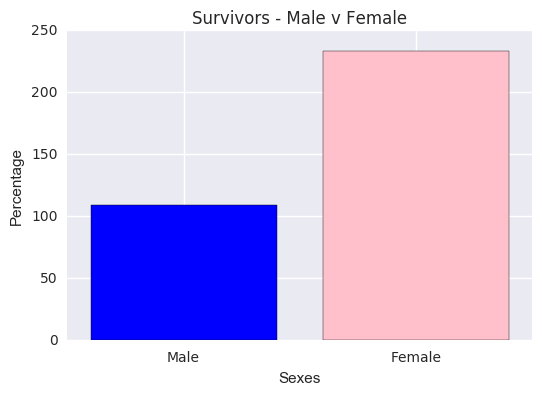

In [247]:
#Get survived data for each sex
male_survived = df_survived[df_survived['Sex'] == 'male']
female_survived = df_survived[df_survived['Sex'] == 'female']

#Display bar graph of Male and Female for Survived
showBarSex([male_survived['Sex'], female_survived['Sex']], set_xlab = 'Sexes', set_title = 'Survivors - Male v Female')

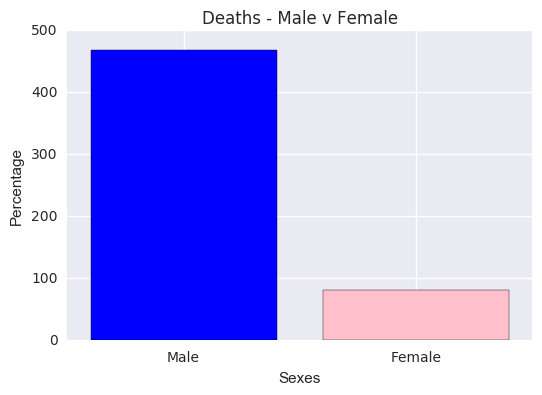

In [248]:
#Get survived data for each sex
male_died = df_died[df_died['Sex'] == 'male']
female_died = df_died[df_died['Sex'] == 'female']

#Display bar graph of Male and Female for Survived
showBarSex([male_died['Sex'], female_died['Sex']], set_xlab = 'Sexes', set_title = 'Deaths - Male v Female')

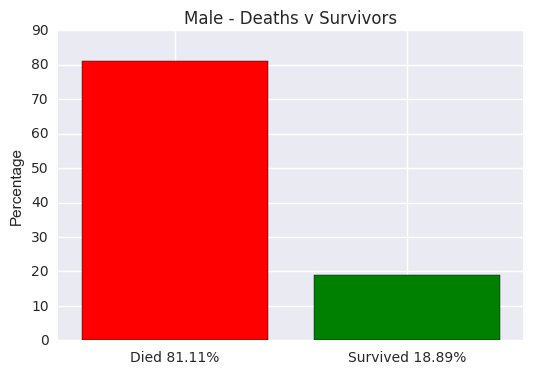

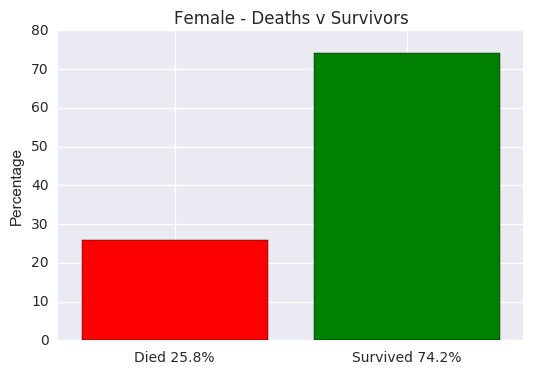

In [249]:
#Display histogram of Male for Died, Survived
male_percentages = getPercentages(df, 'Sex', 'male')
showBarDiedSurvived(male_percentages, set_title = 'Male - Deaths v Survivors')

#Display histogram of Male for Died, Survived
female_percentages = getPercentages(df, 'Sex', 'female')
showBarDiedSurvived(female_percentages, set_title = 'Female - Deaths v Survivors')

    3. Where males or females more likely to survive?
        * Overall, female passengers had the most survivors, shown in graph 'Survivors - Male v Female'.
        * If the passenger was female, they had a 74.2% chance of surviving.
        * If the passenger was male, they had a 18.89% chance of surviving.

Exploring the data to gain insight into the following question:
    4. Did the ticket fare paid effect the likelihood of survival?